In [1]:
clear all

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import io
import scipy.io as sio
%matplotlib inline 
import pylab
import csv
from Tkinter import Tk
from tkFileDialog import askopenfilename
from tkFileDialog import askdirectory
import nibabel as nb
from scipy import io
#from nifti import NiftiImage
import nibabel as nb
from scipy.interpolate import interp1d
from scipy import ndimage

# Open data

In [3]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/sophie/008C0665790F0763/ComboPanNeuronalGCaMP6/40x/960/960ss1_500regcdFF20spsfkf192Smith0_4_60TS.mat


In [4]:
Ua=sio.loadmat(filename)
DT=Ua['TSo']
DT.shape

(5310, 192)

In [5]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename2 = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename2)

/media/sophie/008C0665790F0763/ComboPanNeuronalGCaMP6/40x/960/960ss1_500regcdFF20spsfkf192Smith0_4_60IC.nii


In [6]:
img1 = nb.load(filename2)
data = img1.get_data()
S=data.shape
S

(88, 77, 10, 192)

In [7]:
S=data.shape
S

(88, 77, 10, 192)

Z-score

In [8]:
Demean=np.zeros(S)
Dmaps=np.zeros(S)
Dvar=np.zeros(S)
Var=np.zeros(S[3])
D2=np.zeros([S[0],S[1],5,S[3]])
Tvar=np.zeros(S[3])

In [9]:
for i in range(S[3]):
    Demean[:,:,:,i]=data[:,:,:,i]-np.mean(np.mean(np.mean(data[:,:,:,i],0),0),0)

In [10]:
for i in range(S[3]):
    Dsq=np.reshape(Demean[:,:,:,i],S[0]*S[1]*S[2])
    Var[i]=np.sqrt(np.var(Dsq))
    Dvar=Demean[:,:,:,i]/Var[i]
    Dmaps[:,:,:,i]=Dvar-2.5
    Tvar[i]=np.var(DT[i,:])
Dmaps[Dmaps<0]=0

# Open Masks

In [11]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenameM = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filenameM)
img1 = nb.load(filenameM)
Masks = img1.get_data()
Sm=Masks.shape
Masks=np.array(Masks)

/media/sophie/008C0665790F0763/ComboPanNeuronalGCaMP6/40x/960/960registration/JFRC960Transformedfullpsftrimmed.nii


In [12]:
filenameM='/home/sophie/RegionList'
with open(filenameM) as f:
    content = f.readlines()
Names=[Line.split('\t') for Line in content]
RegionName=[Names[i][0] for i in range(75)]
Num=[int(Names[i][2]) for i in range(75)]

# Average in masks to sort components by brain region

In [13]:
Dmaps.shape

(88, 77, 10, 192)

In [14]:
M=np.zeros((S[3],86))
Mapmean=np.zeros(S[3])
MMasks=np.zeros(86)

In [15]:
for i in range(S[3]):
    Mapmean[i]=np.mean(np.mean(np.mean(Dmaps[:,:,:,i])))
    for j in range(86):
        MMasks[j]=np.mean(np.mean(np.mean(Masks[:,:,:,j])))
        if MMasks[j]:
            M[i,j]=np.mean(np.mean(np.mean(Masks[:,:,:,j]*Dmaps[:,:,:,i])))/(MMasks[j]*Mapmean[i])

In [16]:
CompMainName=S[3]*['']
CompNameAdd=np.zeros((S[3],86))
for i in range(S[3]):
    Max=np.max(M[i,:])
    I=np.argmax(M[i,:])+1
    for j in range(86):
        J=[l for l in range(74) if Num[l]==(j+1)]
        if M[i,j]>0.2*Max:
            CompNameAdd[i,J]=1
    J=[l for l in range(74) if Num[l]==I]
    if J!= []:
        CompMainName[i]=Names[np.array(J)][0]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


In [17]:
J

[45]

BU_R
MB_VL_R
GA_R
38
BU_R
IPS_R
MB_VL_L
178
bulb


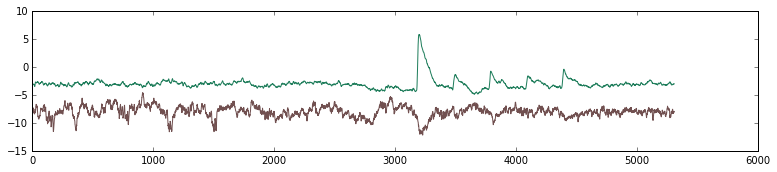

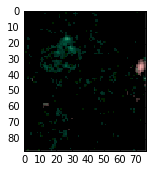

PB
ICL_R
MB_CA_R
1
PB
36
PB
73
PB
85
PB
89
PB
92
PB
ATL_R
95
PB
104
PB
137
PB
IB_R
156
protocerebral bridge


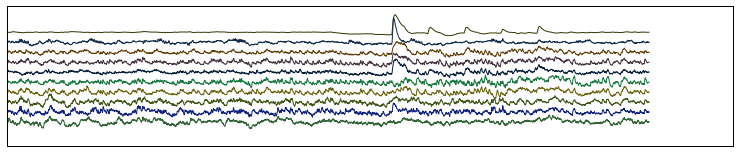

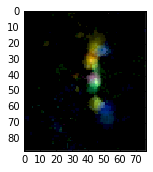

AMMC_R
127
antennal mechanosensory and motor center


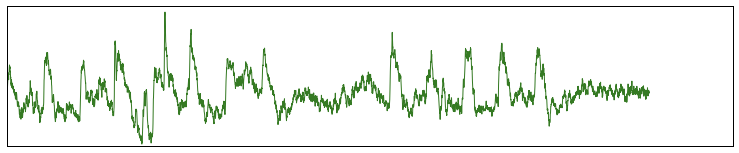

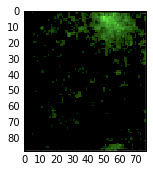

ICL_R
MB_VL_R
6
inferior clamp


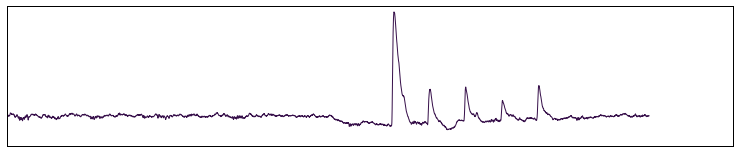

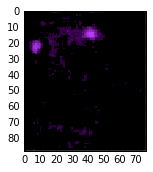

ATL_R
MB_CA_R
67
PB
ATL_R
91
ATL_R
115
ATL_R
157
antler


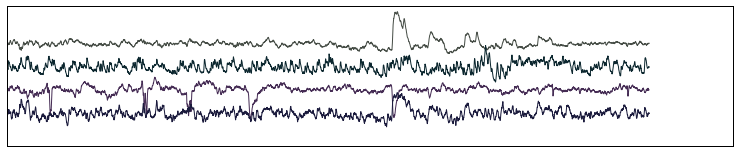

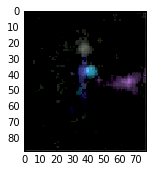

MB_VL_R
MB_ML_R
0
MB_VL_R
MB_ML_R
12
MB_VL_R
14
vertical lobe of adult mushroom body


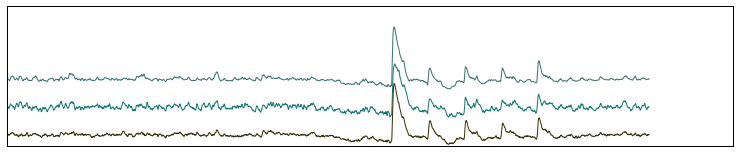

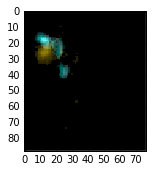

MB_VL_R
MB_ML_R
41
MB_ML_R
AL_R
AL_L
43
CRE_R
MB_VL_R
MB_ML_R
48
medial lobe of adult mushroom body


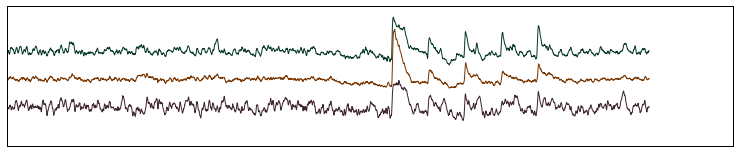

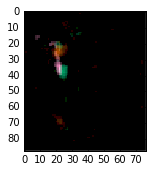

EB
SLP_R
MB_VL_L
MB_ML_L
87
EB
FB
90
EB
117
BU_R
EB
119
EB
FB
120
EB
131
EB
FB
163
ellipsoid body


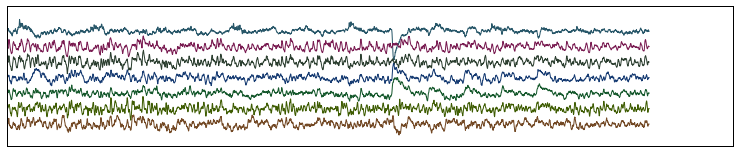

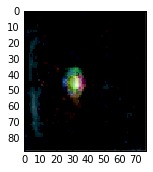

AL_R
AL_L
2
AL_R
AL_L
4
AL_R
AL_L
15
AL_R
17
AL_R
20
AL_R
AL_L
25
LAL_R
AL_R
27
AL_R
AL_L
37
AL_R
46
AL_R
60
AL_R
63
AL_R
GA_R
65
AL_R
PLP_R
68
AL_R
75
MB_ML_R
AL_R
AL_L
78
MB_VL_R
AL_R
94
AL_R
107
adult antennal lobe


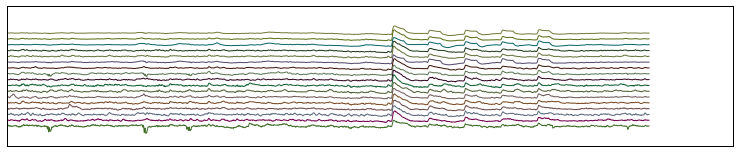

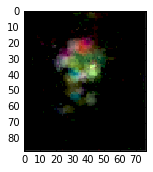

BU_R
FB
SMP_R
126
PB
FB
SMP_L
140
FB
ATL_L
144
FB
149
FB
SMP_L
172
FB
ATL_L
SMP_L
176
fan-shaped body


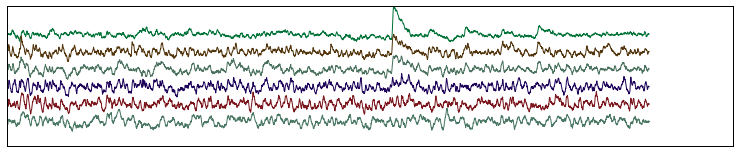

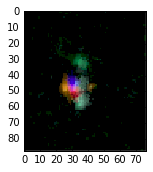

SLP_R
SIP_R
8
SLP_R
47
SLP_R
SCL_R
83
SLP_R
100
superior lateral protocerebrum


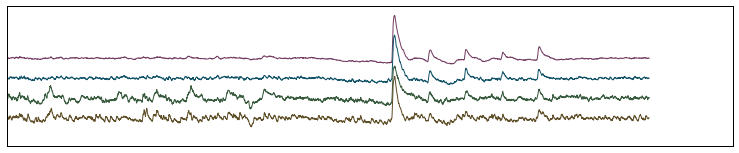

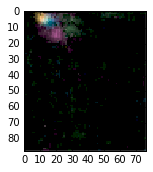

SIP_R
SMP_R
56
superior intermediate protocerebrum


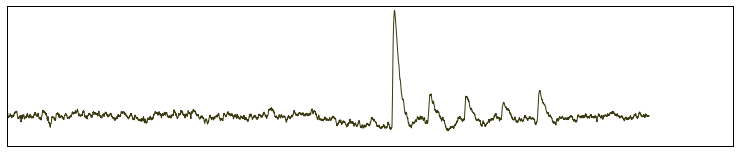

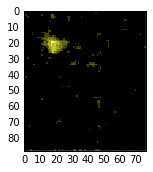

SMP_R
29
SMP_R
40
SMP_R
80
SMP_R
93
SLP_R
SMP_R
SCL_R
99
SMP_R
105
SMP_R
110
BU_R
SMP_R
113
SMP_R
SMP_L
122
SMP_R
128
SMP_R
129
SMP_R
153
FB
SMP_R
161
FB
SMP_R
177
ATL_R
SMP_R
180
superior medial protocerebrum


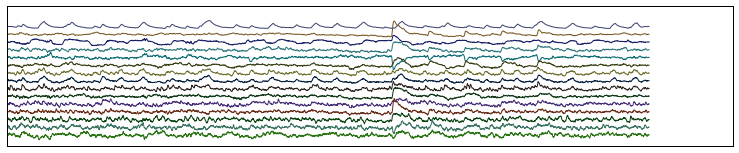

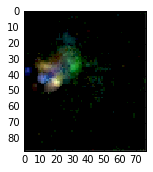

AVLP_R
IVLP_R
PLP_R
AMMC_L
50
posterior lateral protocerebrum


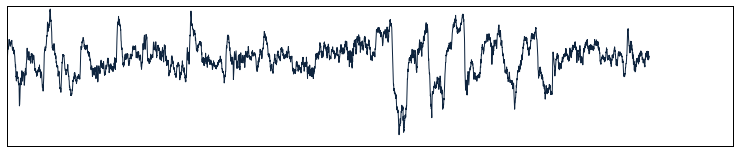

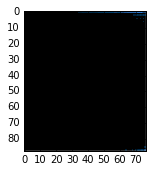

MB_CA_R
28
MB_CA_R
66
ICL_R
MB_CA_R
81
EB
MB_CA_R
SMP_L
114
calyx of adult mushroom body


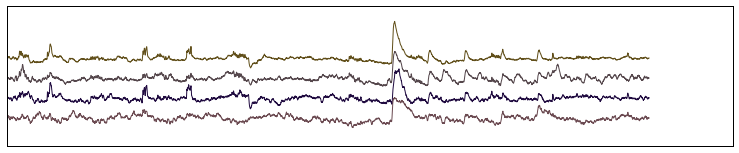

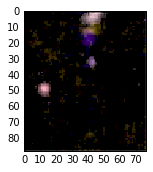

SPS_R
IPS_R
61
AL_R
SPS_R
138
superior posterior slope


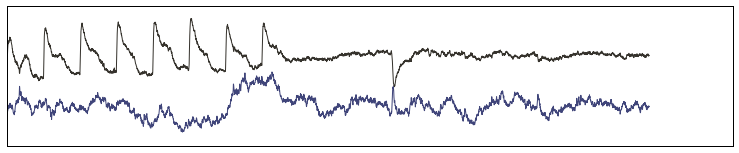

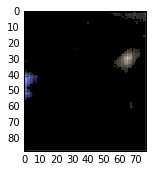

IPS_R
GNG
5
inferior posterior slope


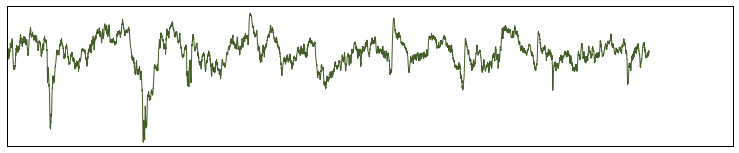

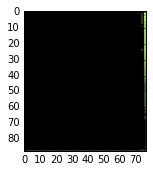

MB_CA_R
SCL_R
45
superior clamp


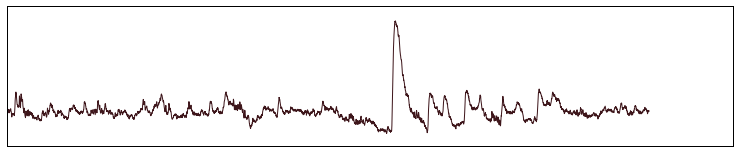

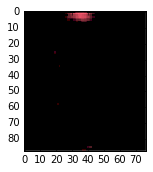

GNG
18
SAD
GNG
58
adult gnathal ganglion


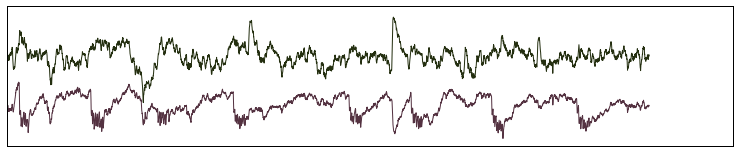

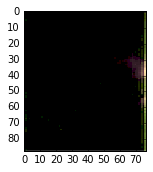

PRW
44
prow


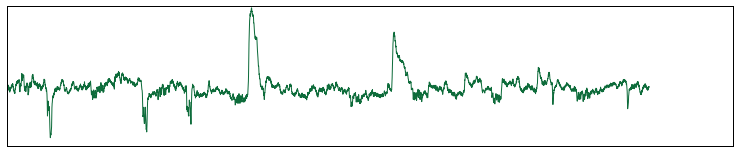

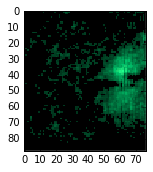

BU_L
125
bulb


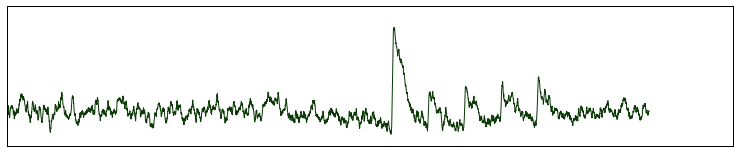

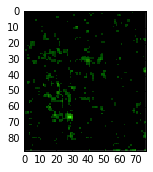

GNG
PRW
AMMC_L
108
AMMC_R
AMMC_L
AVLP_L
109
antennal mechanosensory and motor center


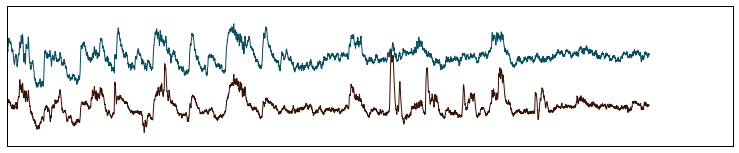

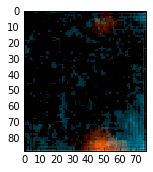

IB_L
185
inferior bridge


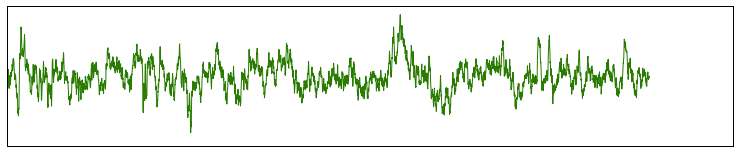

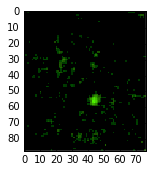

PB
ATL_L
111
PB
ATL_R
ATL_L
132
antler


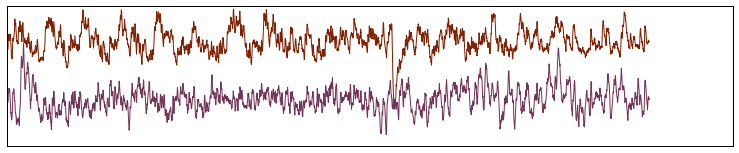

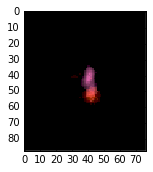

BU_R
EB
ICL_L
MB_PED_L
179
pedunculus of adult mushroom body


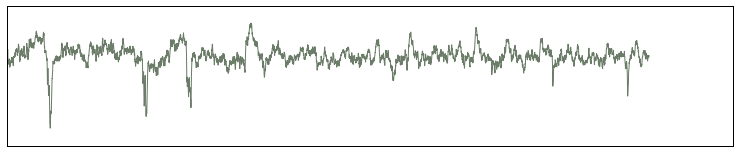

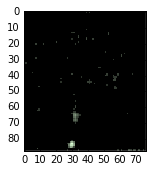

MB_VL_L
3
MB_VL_L
MB_ML_L
11
MB_VL_L
SMP_L
34
MB_VL_L
MB_CA_L
59
vertical lobe of adult mushroom body


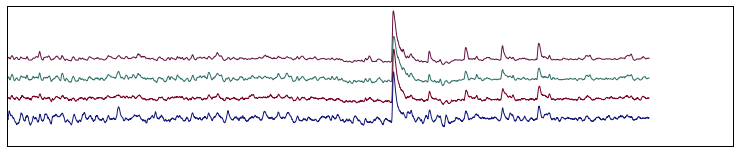

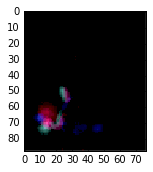

CRE_L
MB_VL_L
MB_ML_L
31
MB_ML_L
69
medial lobe of adult mushroom body


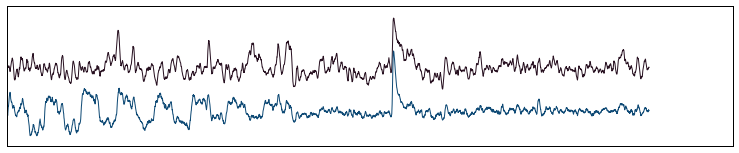

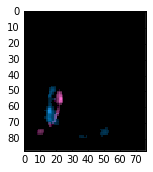

FLA_R
CAN_L
FLA_L
154
flange


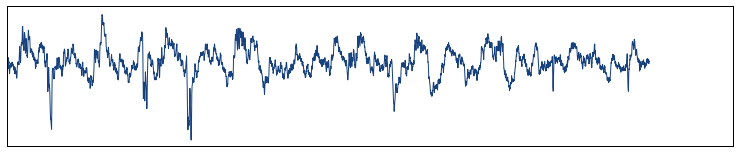

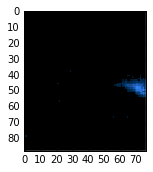

ATL_R
AL_R
AL_L
13
AL_L
16
AL_L
24
AL_R
AL_L
30
LAL_L
AL_L
33
BU_R
AL_L
51
NO
FLA_R
FLA_L
AL_L
52
AL_L
54
AL_L
55
LAL_L
AL_L
MB_CA_L
62
LAL_L
AL_L
77
AL_L
98
adult antennal lobe


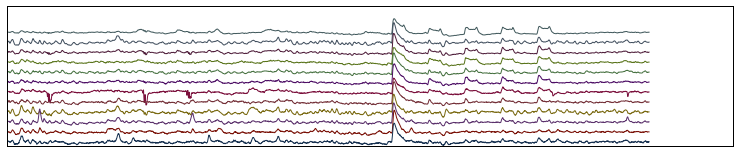

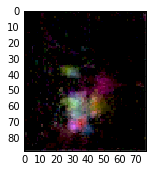

GNG
MB_ML_L
SLP_L
7
SLP_L
19
EB
SLP_R
MB_VL_L
SLP_L
22
SLP_L
32
SLP_L
71
SLP_L
SCL_L
82
superior lateral protocerebrum


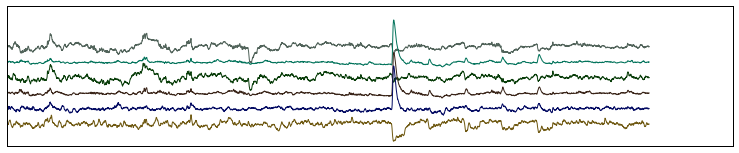

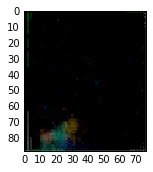

SLP_L
SIP_L
9
superior intermediate protocerebrum


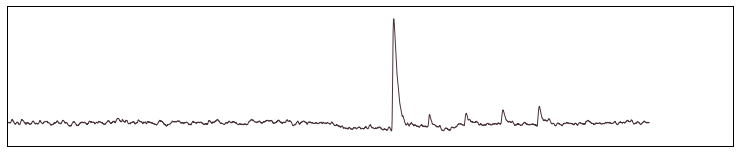

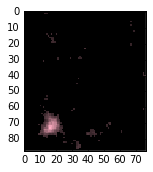

SMP_L
64
SMP_L
86
SMP_L
101
SMP_L
112
SLP_L
SMP_L
116
BU_L
SMP_L
135
SMP_L
159
SMP_L
181
superior medial protocerebrum


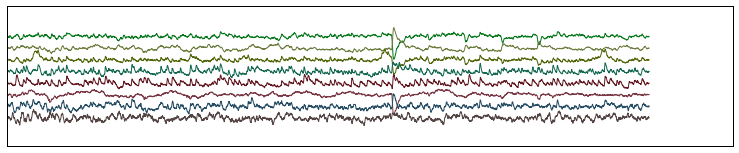

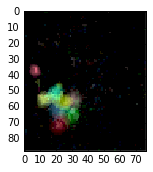

SLP_L
PLP_L
SCL_L
21
PLP_L
70
PLP_L
MB_CA_L
76
AL_L
PLP_L
102
posterior lateral protocerebrum


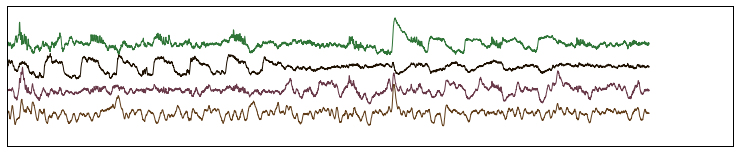

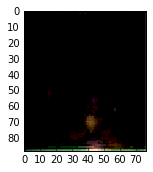

SLP_L
MB_CA_L
10
MB_CA_L
42
MB_CA_L
57
MB_CA_L
151
MB_CA_L
166
calyx of adult mushroom body


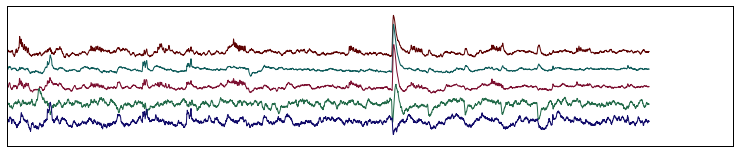

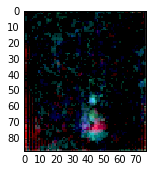

SPS_L
49
IPS_R
SPS_L
88
MB_VL_R
PLP_L
SPS_L
147
superior posterior slope


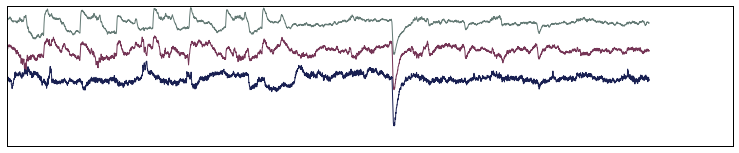

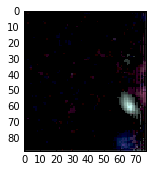

GNG
IPS_L
26
IPS_L
134
inferior posterior slope


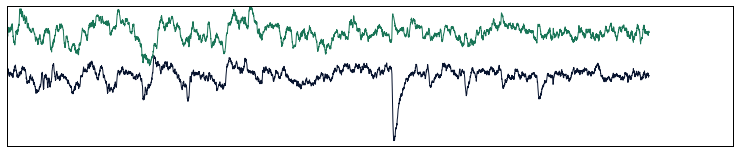

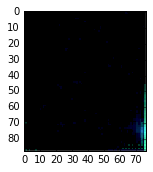

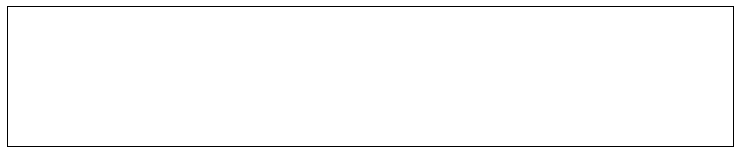

In [18]:
pylab.rcParams['figure.figsize'] = (13, 2.5)

h=5
tot=0
GoodICAnat=np.zeros(S[3])

for l in range(74):
    Final_maps=np.zeros((S[0],S[1],3))
    Fmap=np.zeros((S[0],S[1],3))
    C=np.zeros(3)

    n=0
    for i in range(len(CompMainName)):                    
        Dmmv=np.mean(data[:,:,:,i],2) 
        Dmmv[Dmmv<0.2*np.max(np.max(np.max(Dmmv)))]=0
        C=np.squeeze(np.random.rand(3,1))
        labeled, nrobject=ndimage.label(Dmmv>0)
        
        if CompMainName[i]==Names[l][0] and (sum(CompNameAdd[i,:])<5) and nrobject<200:
            n=n+1            
            
            for k in range(3):
                Fmap[:,:,k]=0.7*Dmmv*C[k]/np.max(C)
            Final_maps=Final_maps+Fmap
            #plt.plot(Time_fluoICA.T,(DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
            plt.plot((DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
            tot=tot+1
            GoodICAnat[i]=1
            #print(i)
            for j in range(86):
                if CompNameAdd[i,j]==1:                
                    print(Names[np.array(j)][0])
            print(i)
            
                    
    if n!=0:
        print(Names[l][1])

        plt.show()
        FM=Final_maps/np.max(np.max(Final_maps))
        FM[FM<0.1]=0
        plt.imshow(FM,interpolation='none')
        plt.show()
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        


##### Looked at the components maps and time series and remove all the components which are localized on the edge of the brain and with activity unlike GCaMP6 transients.


In [19]:
BadICs=[178,115,87,138,5,18,58,125,154,22,21,10,26,134]

In [20]:
for idx in BadICs:
    GoodICAnat[idx] = 0.0

# Reorder by larger sub-regions (~ presumed stimulus to motor)

In [21]:
LargerRegionsDic={'':'','AME_R':'OL','LO_R':'OL','NO':'CX','BU_R':'CX','PB':'CX','LH_R':'LH','LAL_R':'LX','SAD':'PENP'
               ,'CAN_R':'PENP','AMMC_R':'PENP','ICL_R':'INP','VES_R':'VMNP','IB_R':'INP','ATL_R':'INP','CRE_R':'INP'
               ,'MB_PED_R':'MB','MB_VL_R':'MB','MB_ML_R':'MB','FLA_R':'PENP','LOP_R':'OL','EB':'CX','AL_R':'AL',
                'ME_R':'OL','FB':'CX','SLP_R':'SNP','SIP_R':'SNP','SMP_R':'SNP','AVLP_R':'VLNP','PVLP_R':'VLNP',
                'IVLP_R':'VLNP','PLP_R':'VLNP','AOTU_R':'VLNP','GOR_R':'VMNP','MB_CA_R':'MB','SPS_R':'VMNP',
                'IPS_R':'VMNP','SCL_R':'INP','EPA_R':'VMNP','GNG':'GNG','PRW':'PENP','GA_R':'LX','AME_L':'OL'
                ,'LO_L':'OL','BU_L':'CX','LH_L':'LH','LAL_L':'LX','CAN_L':'PENP','AMMC_L':'PENP','ICL_L':'INP',
                'VES_L':'VMNP','IB_L':'INP','ATL_L':'INP','CRE_L':'INP','MB_PED_L':'MB','MB_VL_L':'MB',
                'MB_ML_L':'MB','FLA_L':'PENP','LOP_L':'OL','AL_L':'AL','ME_L':'OL','SLP_L':'SNP','SIP_L':'SNP',
                'SMP_L':'SNP','AVLP_L':'VLNP','PVLP_L':'VLNP','IVLP_L':'VLNP','PLP_L':'VLNP','AOTU_L':'VLNP',
                'GOR_L':'VMNP','MB_CA_L':'MB','SPS_L':'VMNP','IPS_L':'VMNP','SCL_L':'INP','EPA_L':'VMNP','GA_L':'LX'}

SmallRegionsSorted=['ME_L','ME_R','LO_R','LO_L','LOP_R','LOP_L','AME_R','AME_L',
                  'PLP_R','PLP_L','PVLP_R','PVLP_L','AVLP_R','AVLP_L','AOTU_R','AOTU_L','IVLP_R','IVLP_L',
                  'AL_R','AL_L',
                  'MB_CA_R','MB_CA_L','MB_PED_R','MB_PED_L','MB_VL_R','MB_VL_L','MB_ML_R','MB_ML_L',
                  'SMP_R','SMP_L','SIP_R','SLP_L','SLP_R','SIP_L',
                  'LH_R','LH_L',                  
                  'CRE_R','CRE_L','ICL_R','ICL_L','SCL_R','SCL_L','IB_R','IB_L','ATL_R','ATL_L',
                  'EB','PB','NO','FB',
                  'BU_R','BU_L','LAL_R','LAL_L','GA_R','GA_L',
                  'GOR_R','GOR_L','EPA_R','EPA_L','VES_R','VES_L','SPS_R','SPS_L','IPS_R','IPS_L',
                  'AMMC_R','AMMC_L','SAD','FLA_R','FLA_L','PRW','CAN_R','CAN_L',
                  'GNG','']

Tozip=range(len(SmallRegionsSorted))
SmallRegionsDic=dict(zip(SmallRegionsSorted,Tozip))

LargerRegion=[LargerRegionsDic[CompMainName[i]] for i in range(S[3])]

LargerRegionInd={ 'OL':1,'VLNP':2,'VMNP':3,'AL':4,'MB':5,'LH':6,'SNP':7,'CX':8,'LX':9,'INP':10,'PENP':11,'GNG':12,'':13}

LargerRegionI=np.array([LargerRegionInd[LargerRegion[i]] for i in range(S[3])])

SmallRegion=np.array([SmallRegionsDic[CompMainName[i]] for i in range(S[3])])

NewOrder=np.argsort(SmallRegion)

SmallRegion[NewOrder]

array([ 8,  8,  8,  9,  9,  9,  9, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21,
       21, 21, 23, 24, 24, 24, 25, 25, 25, 25, 26, 26, 26, 27, 27, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29,
       29, 29, 29, 29, 29, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32,
       32, 32, 32, 33, 37, 38, 38, 39, 40, 40, 40, 41, 42, 42, 43, 43, 44,
       44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46,
       46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 49, 49, 49,
       49, 49, 49, 49, 49, 50, 50, 50, 50, 51, 53, 53, 62, 62, 62, 62, 62,
       63, 63, 63, 64, 64, 65, 65, 66, 66, 67, 67, 69, 69, 70, 71, 74, 74,
       75, 75, 75, 75, 75])

In [22]:
LargerRegionIndToName = {v: k for k, v in LargerRegionInd.iteritems()}

In [23]:
LargerRegionI

array([ 5,  8,  4,  5,  4,  3, 10,  7,  7,  7,  5,  5,  5,  4,  5,  4,  4,
        4, 12,  7,  4,  2,  7,  2,  4,  4,  3,  4,  5,  7,  4,  5,  7,  4,
        5,  3,  8,  4,  8, 10,  7,  5,  5,  5, 11, 10,  4,  7,  5,  3,  2,
        4,  4,  8,  4,  4,  7,  5, 12,  5,  4,  3,  4,  4,  7,  4,  5, 10,
        4,  5,  2,  7, 11,  8,  7,  4,  2,  4,  4,  5,  7,  5,  7,  7,  8,
        8,  7,  8,  3,  8,  8, 10,  8,  7,  4,  8,  5, 10,  4,  7,  7,  7,
        2,  5,  8,  7, 13,  4, 11, 11,  7, 10,  7,  7,  5, 10,  7,  8,  5,
        8,  8,  3,  7,  8,  8,  8,  8, 11,  7,  7, 10,  8, 10, 10,  3,  7,
       13,  8,  3,  7,  8,  3, 13,  3,  8, 10,  7,  3, 10,  8,  5,  5, 11,
        7, 11,  2,  8, 10,  4,  7, 10,  7, 10,  8,  7,  8,  5,  7, 10, 10,
        5,  8,  8, 10, 13, 10,  8,  7,  8,  5,  7,  7, 11,  8,  5, 10, 13,
       10,  8, 10,  9,  9])

In [24]:
GoodICAnat

array([ 1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,
        0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,
        0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,
        1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,
        1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,
        0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
        0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,
        1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1

OL
VLNP
50
70
76
102


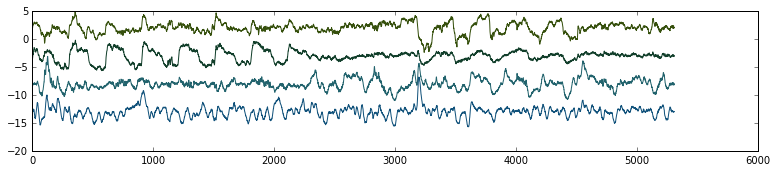

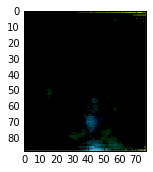

VMNP
49
61
88
147


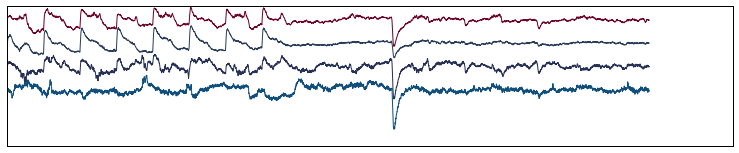

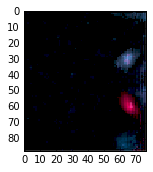

AL
2
4
13
15
16
17
20
24
25
27
30
33
37
46
51
52
54
55
60
62
63
65
68
75
77
78
94
98
107


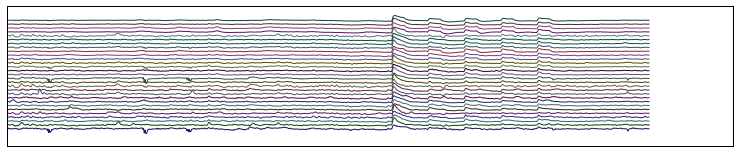

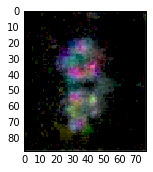

MB
0
3
11
12
14
28
31
34
41
42
43
48
57
59
66
69
81
114
151
166
179


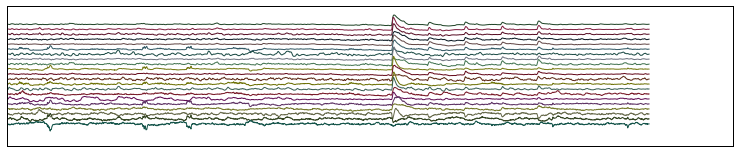

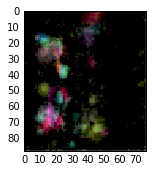

LH
SNP
7
8
9
19
29
32
40
47
56
64
71
80
82
83
86
93
99
100
101
105
110
112
113
116
122
128
129
135
153
159
161
177
180
181


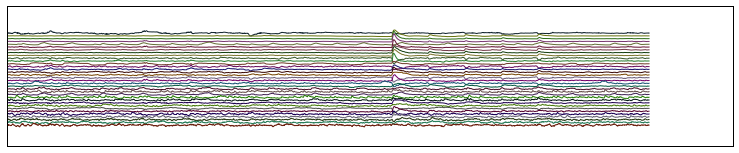

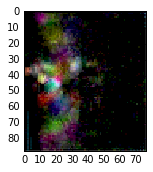

CX
1
36
38
73
85
89
90
92
95
104
117
119
120
126
131
137
140
144
149
156
163
172
176


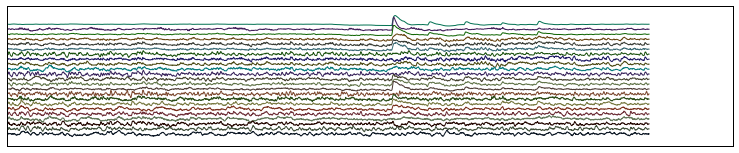

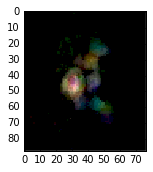

LX
INP
6
45
67
91
111
132
157
185


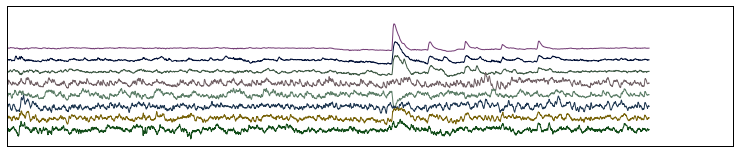

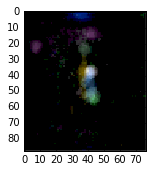

PENP
44
108
109
127


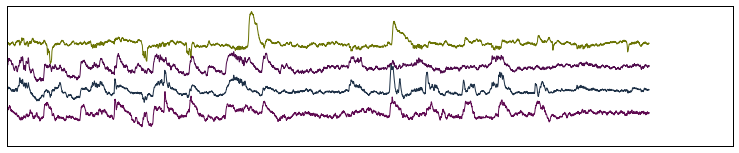

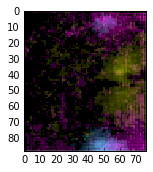

GNG


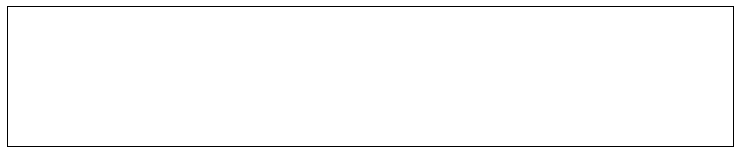

In [25]:
pylab.rcParams['figure.figsize'] = (13, 2.5)

h=5
tot=0
NumberInLargeRegion=np.zeros(13)

for l in range(1,13):
    print(LargerRegionIndToName[l])
    Final_maps=np.zeros((S[0],S[1],3))
    Fmap=np.zeros((S[0],S[1],3))
    C=np.zeros(3)

    n=0
    for i in range(len(CompMainName)):                    
        Dmmv=np.mean(data[:,:,:,i],2) 
        Dmmv[Dmmv<0.2*np.max(np.max(np.max(Dmmv)))]=0
        C=np.squeeze(np.random.rand(3,1))
        labeled, nrobject=ndimage.label(Dmmv>0)
        
        if LargerRegionI[i]==l:          
            if GoodICAnat[i]==1:
                for k in range(3):
                    Fmap[:,:,k]=0.7*Dmmv*C[k]/np.max(C)
                Final_maps=Final_maps+Fmap
                #plt.plot(Time_fluoICA.T,(DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
                plt.plot((DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
                tot=tot+1
                print(i)
                n=n+1 
                    
    if n!=0:

        plt.show()
        FM=Final_maps/np.max(np.max(Final_maps))
        FM[FM<0.1]=0
        plt.imshow(FM,interpolation='none')
        plt.show()
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        
    NumberInLargeRegion[l]=n

In [26]:
# Output number of component per region
np.savetxt('/'.join(filename.split('/')[:-1])+'/NumberInLargeRegions.txt',NumberInLargeRegion)